In [2]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import datetime as dt

In [3]:
movies_final_csv = "movies_final.csv"

In [4]:
movies_final_df = pd.read_csv("movies_final.csv")
movies_final_df.head()

,genres,movie_id,budget,title,popularity,release_date,revenue,ROI,Director
0,Animation,862,30000000,Toy Story,21.946943,10/30/1995,373554033,1145.18011,John Lasseter
1,Comedy,862,30000000,Toy Story,21.946943,10/30/1995,373554033,1145.18011,John Lasseter
2,Family,862,30000000,Toy Story,21.946943,10/30/1995,373554033,1145.18011,John Lasseter
3,Adventure,8844,65000000,Jumanji,17.015539,12/15/1995,262797249,304.30346,Joe Johnston
4,Fantasy,8844,65000000,Jumanji,17.015539,12/15/1995,262797249,304.30346,Joe Johnston


In [5]:
movies_final_df.release_date = pd.to_datetime(movies_final_df.release_date)
movies_final_df["release_year"] = movies_final_df.release_date.dt.year
movies_final_df.head()

,genres,movie_id,budget,title,popularity,release_date,revenue,ROI,Director,release_year
0,Animation,862,30000000,Toy Story,21.946943,1995-10-30,373554033,1145.18011,John Lasseter,1995
1,Comedy,862,30000000,Toy Story,21.946943,1995-10-30,373554033,1145.18011,John Lasseter,1995
2,Family,862,30000000,Toy Story,21.946943,1995-10-30,373554033,1145.18011,John Lasseter,1995
3,Adventure,8844,65000000,Jumanji,17.015539,1995-12-15,262797249,304.30346,Joe Johnston,1995
4,Fantasy,8844,65000000,Jumanji,17.015539,1995-12-15,262797249,304.30346,Joe Johnston,1995


In [6]:
top_genre_popularity_at = movies_final_df.groupby(["genres"]).mean()["popularity"]
top_genre_popularity_at.head()

genres
Action       12.063876
Adventure    13.871913
Animation    14.501584
Comedy        8.961415
Crime        10.042998
Name: popularity, dtype: float64

In [9]:
top_genre_popularity_at_sorted = top_genre_popularity_at.sort_values(ascending = False)
top_genre_popularity_at_sorted.head()

genres
Animation          14.501584
Fantasy            13.889901
Adventure          13.871913
Science Fiction    13.180742
Family             12.781645
Name: popularity, dtype: float64

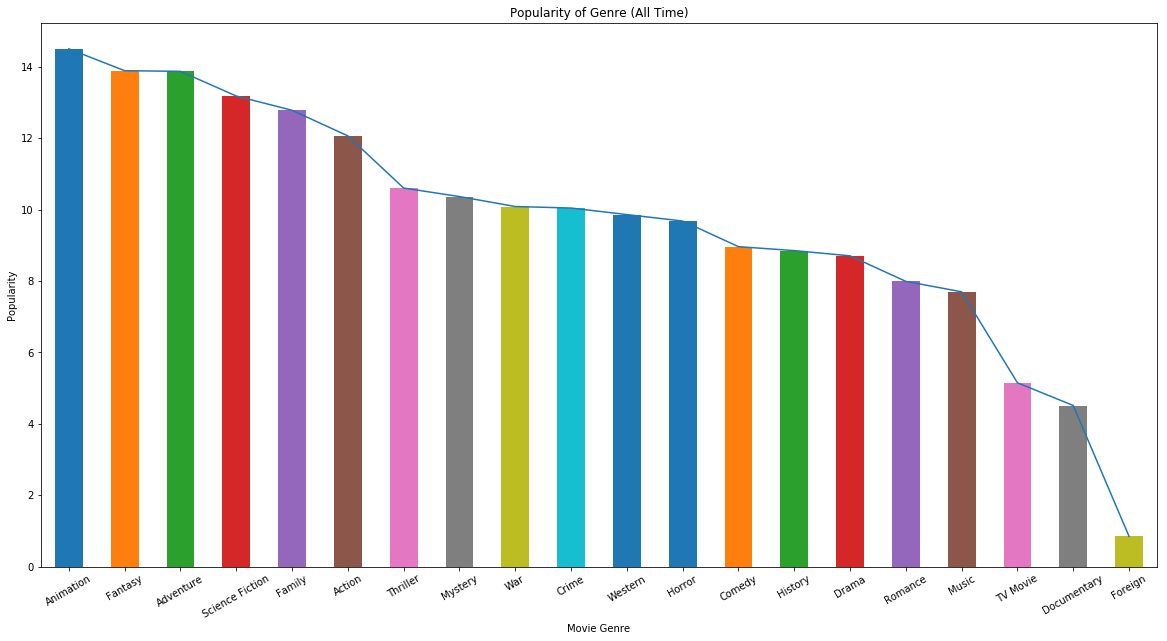

In [10]:
#cumulative popularity by Genre (all time)
ax = top_genre_popularity_at_sorted.plot.bar (x='genres', y='popularity', rot=0)

top_genre_popularity_at_sorted.plot(figsize=(20,10))


x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("Popularity")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Popularity of Genre (All Time)")

In [118]:
#EDB
# Number of movies in each genre by year.
top_genre_popularity = movies_final_df.groupby(["genres","release_year"]).count()["popularity"]
top_genre_popularity.head()

genres  release_year
Action  1916            1
        1924            1
        1930            1
        1931            1
        1933            1
Name: popularity, dtype: int64

In [7]:
#count numb of action movies in movies final df
action_df = movies_final_df[(movies_final_df.genres == "Action")]
action_df.count()

genres          1403
movie_id        1403
budget          1403
title           1403
popularity      1403
release_date    1403
revenue         1403
ROI             1403
Director        1403
release_year    1403
dtype: int64

In [8]:
# ?plt.plot()

In [9]:
action_table_df = pd.DataFrame({'Number of Action Movies' : action_df[["genres","release_year"]].copy()
                               .groupby(["genres", "release_year"]).size()})
action_table_df = action_table_df.reset_index()
action_table_df.head()
# action_table_df.genres.unique()

,genres,release_year,Number of Action Movies
0,Action,1916,1
1,Action,1924,1
2,Action,1930,1
3,Action,1931,1
4,Action,1933,1


In [30]:
#EDB
#sort to 5 scores descending

top_genre_ROI_sorted = top_genre_ROI.sort_values(ascending=False)

#print to test                                  
top_genre_ROI_sorted.head()


genres
Mystery        4165.953023
Horror         3987.583365
Documentary    1536.151919
History        1236.084687
TV Movie        740.000000
Name: ROI, dtype: float64

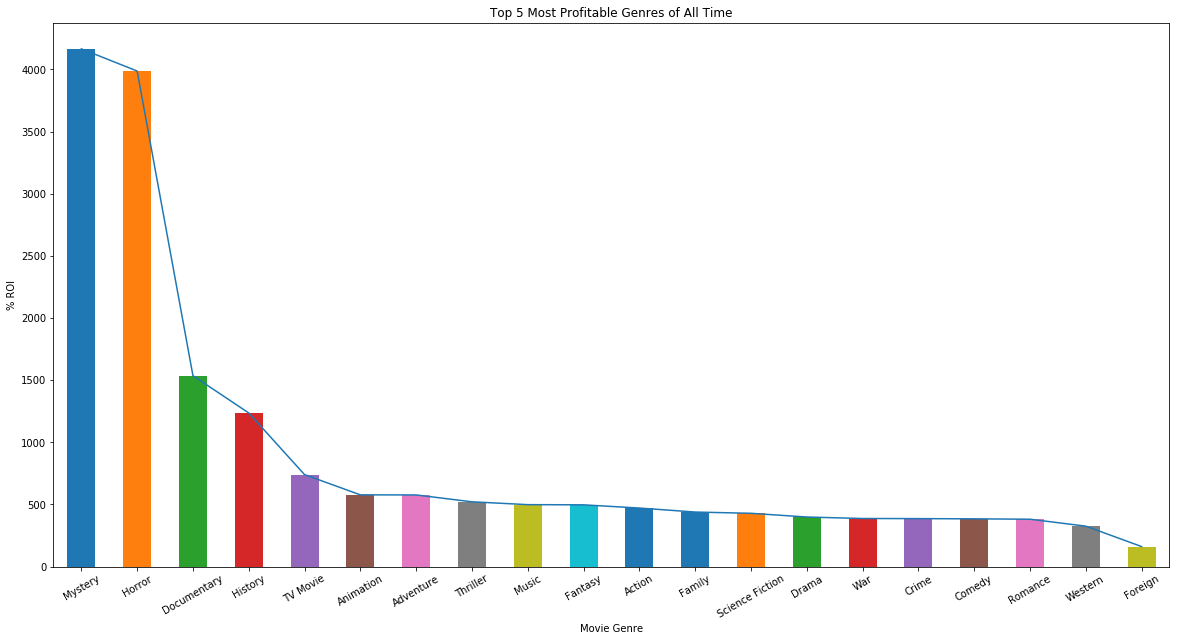

In [31]:
#Plot genres by ROI, cumulative 
ax = top_genre_ROI_sorted.plot.bar (x='genres', y='ROI', rot=0)

top_genre_ROI_sorted.plot(figsize=(20,10))


x=ax.set_xlabel("Movie Genre")
b=ax.set_ylabel("% ROI")
c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
d=ax.set_title("Top 5 Most Profitable Genres of All Time")

In [10]:
#Checking unique genres
genres = movies_final_df.genres.unique()
len(genres)

20

In [11]:
#EDB
movies_final_df2 = pd.DataFrame({'Number of Movies' : movies_final_df[["genres","release_year"]].copy()
                               .groupby(["genres", "release_year"]).size()})
movies_final_df2 = movies_final_df2.reset_index()
movies_final_df2.head(10)

,genres,release_year,Number of Movies
0,Action,1916,1
1,Action,1924,1
2,Action,1930,1
3,Action,1931,1
4,Action,1933,1
5,Action,1936,1
6,Action,1938,1
7,Action,1941,1
8,Action,1948,2
9,Action,1949,1


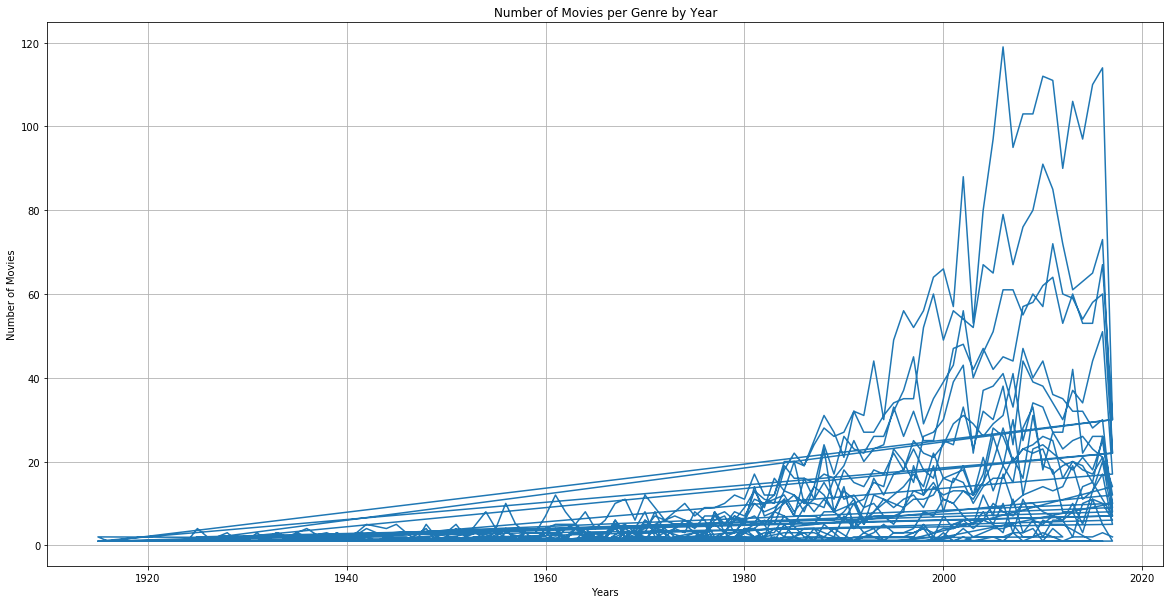

In [12]:
plt.figure(figsize=(20,10))
plt.plot(movies_final_df2.release_year, movies_final_df2["Number of Movies"])

plt.xlabel('Years')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre by Year')
plt.grid(True)
plt.savefig("test.png")
plt.show()

#Too much noise. Plot each line separately.

In [15]:
movies_final_uncut_df = "movies_final_uncut.csv"
movies_final_uncut_df = pd.read_csv("movies_final_uncut.csv")
movies_final_uncut_df.head()

,genres,movie_id,budget,title,popularity,release_date,revenue,ROI,Director
0,Animation,862,30000000,Toy Story,21.946943,10/30/1995,373554033.0,1145.18011,John Lasseter
1,Comedy,862,30000000,Toy Story,21.946943,10/30/1995,373554033.0,1145.18011,John Lasseter
2,Family,862,30000000,Toy Story,21.946943,10/30/1995,373554033.0,1145.18011,John Lasseter
3,Adventure,8844,65000000,Jumanji,17.015539,12/15/1995,262797249.0,304.30346,Joe Johnston
4,Fantasy,8844,65000000,Jumanji,17.015539,12/15/1995,262797249.0,304.30346,Joe Johnston


In [16]:
#filter movies final uncut for only action
action_uncut_df = movies_final_uncut_df[(movies_final_uncut_df.genres == "Action")]
action_uncut_df.count()

genres          6563
movie_id        6563
budget          6563
title           6561
popularity      6561
release_date    6560
revenue         6561
ROI             2438
Director        6563
dtype: int64

In [17]:
action_table_uncut_df = pd.DataFrame({'Number of Action Movies' : action_df[["genres","release_year"]].copy()
                               .groupby(["genres", "release_year"]).size()})
action_table_uncut_df = action_table_uncut_df.reset_index()
action_table_uncut_df.head()

,genres,release_year,Number of Action Movies
0,Action,1916,1
1,Action,1924,1
2,Action,1930,1
3,Action,1931,1
4,Action,1933,1


In [19]:
#EDB
#sort to scores descending
# top_genre_popularity_sorted = top_genre_popularity.sort_values("popularity", ascending = False)
top_genre_popularity_sorted = top_genre_popularity.sort_values(ascending=False)

# top_genre_popularity_sorted.release_year = pd.to_datetime(top_genre_popularity_sorted.release_year)
#print to test                                  
top_genre_popularity_sorted = top_genre_popularity_sorted.groupby(['genres','release_year']).sum()



In [15]:
#trying to filter out all years before 1960
#top_genre_popularity_sorted_df['release_year'] = pd.to_numeric(top_genre_popularity_sorted_df['release_year'])
# exclude = top_genre_popularity_sorted_df[top_genre_popularity_sorted_df['release_year'].dt.year > 1959]

In [38]:
genre_list = topGenresByPopularity.reset_index()['genres'].value_counts().index

In [26]:
 #top_genre_popularity_sorted_df.release_year = pd.to_numeric(top_genre_popularity_sorted_df.release_year)

In [33]:
# top_genre_popularity_sorted_df = top_genre_popularity_sorted_df(top_genre_popularity_sorted_df['release_year'] >= 1959)

movies_final_df.genres.unique()

array(['Animation', 'Comedy', 'Family', 'Adventure', 'Fantasy', 'Drama',
       'Romance', 'Action', 'Crime', 'Thriller', 'History',
       'Science Fiction', 'Mystery', 'Horror', 'War', 'Documentary',
       'Western', 'Music', 'Foreign', 'TV Movie'], dtype=object)

In [115]:
#movies_df = pd.read_csv(movie_plot)
movies_dataprep = movies_final_df[['genres', 'popularity', 'release_year']]
topGenresByPopularity = movies_dataprep.groupby(['release_year','genres', ])["popularity"].mean()
topGenresByPopularity=topGenresByPopularity.to_frame()
topGenresByPopularity.reset_index()
topGenresByPopularity
topGenresByPopularity = topGenresByPopularity.sort_values('popularity',ascending = False)
topGenresByPopularity = topGenresByPopularity.reset_index()
topGenresByPopularity.genres.unique()

array(['Fantasy', 'Science Fiction', 'Adventure', 'Action', 'Family',
       'Animation', 'Romance', 'Western', 'Crime', 'War', 'Horror',
       'Thriller', 'Comedy', 'Drama', 'Mystery', 'Music', 'History',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [116]:
genre_list

Index(['Drama', 'Romance', 'Comedy', 'Adventure', 'Action', 'Thriller',
       'Crime', 'Mystery', 'History', 'War', 'Family', 'Music',
       'Science Fiction', 'Horror', 'Fantasy', 'Western', 'Animation',
       'Documentary', 'Foreign', 'TV Movie'],
      dtype='object')

In [114]:
Dramatrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Drama')]
Dramatrend = Dramatrend.sort_values(by=['release_year'])
Dramatrend.head()

,release_year,genres,popularity
1106,1915,Drama,2.896806
1165,1916,Drama,0.917777
1201,1918,Drama,0.211008
692,1921,Drama,8.168456
1169,1922,Drama,0.838095


Text(0.5,1,'Drama Popularity Over Time')

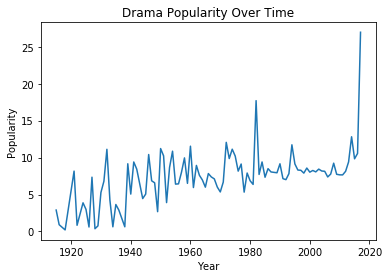

In [99]:
plt.plot(Dramatrend.release_year, Dramatrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Drama Popularity Over Time')

In [56]:
Actiontrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Action')]
Actiontrend = Actiontrend.sort_values(by=['release_year'])
Actiontrend.head()

,release_year,genres,popularity
1167,1916,Action,0.917777
1073,1924,Action,3.878515
1007,1930,Action,5.276546
1146,1931,Action,1.413440
586,1933,Action,8.732740


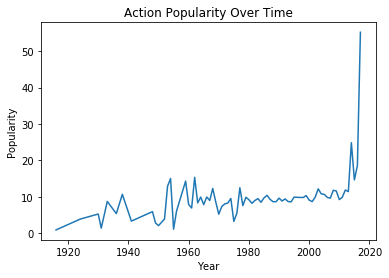

In [98]:
plt.plot(Actiontrend.release_year, Actiontrend.popularity)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Action Popularity Over Time')
plt.show()

In [58]:
Adventuretrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Adventure')]
Adventuretrend = Adventuretrend.sort_values(by=['release_year'])
Adventuretrend.head()

,release_year,genres,popularity
1166,1916,Adventure,0.917777
1072,1924,Adventure,3.878515
1054,1925,Adventure,4.251570
1207,1928,Adventure,0.140491
587,1933,Adventure,8.732740


Text(0.5,1,'Adventure Popularity Over Time')

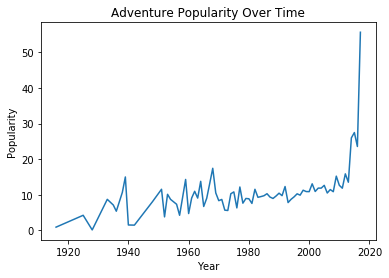

In [97]:
plt.plot(Adventuretrend.release_year, Adventuretrend.popularity)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Adventure Popularity Over Time')

In [60]:
Animationtrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Animation')]
Animationtrend = Animationtrend.sort_values(by=['release_year'])
Animationtrend.head()

,release_year,genres,popularity
58,1937,Animation,16.263878
261,1940,Animation,11.120122
85,1941,Animation,14.655879
115,1942,Animation,13.698132
90,1950,Animation,14.436858


Text(0.5,1,'Animation Popularity Over Time')

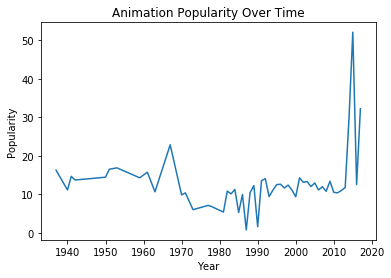

In [101]:
plt.plot(Animationtrend.release_year, Animationtrend.popularity)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Animation Popularity Over Time')

In [62]:
Comedytrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Comedy')]
Comedytrend = Comedytrend.sort_values(by=['release_year'])
Comedytrend.head()

,release_year,genres,popularity
1202,1918,Comedy,0.211008
691,1921,Comedy,8.168456
935,1925,Comedy,6.202041
1203,1927,Comedy,0.205671
290,1931,Comedy,10.891524


Text(0.5,1,'Comedy Popularity Over Time')

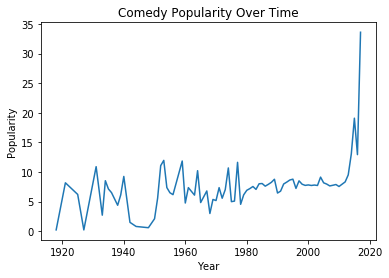

In [102]:
plt.plot(Comedytrend.release_year, Comedytrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Comedy Popularity Over Time')

In [64]:
Crimetrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Crime')]
Crimetrend = Crimetrend.sort_values(by=['release_year'])
Crimetrend.head()

,release_year,genres,popularity
1148,1925,Crime,1.345287
1198,1928,Crime,0.251353
326,1934,Crime,10.573867
969,1941,Crime,5.782544
1046,1945,Crime,4.497049


Text(0.5,1,'Crime Popularity Over Time')

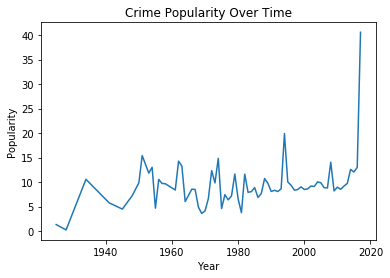

In [103]:
plt.plot(Crimetrend.release_year, Crimetrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Crime Popularity Over Time')

In [66]:
Documentarytrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Documentary')]
Documentarytrend = Documentarytrend.sort_values(by=['release_year'])
Documentarytrend.head()

,release_year,genres,popularity
1084,1970,Documentary,3.624542
1197,1981,Documentary,0.303062
1136,1982,Documentary,1.629796
1125,1984,Documentary,2.359569
1114,1988,Documentary,2.726061


Text(0.5,1,'Documentary Popularity Over Time')

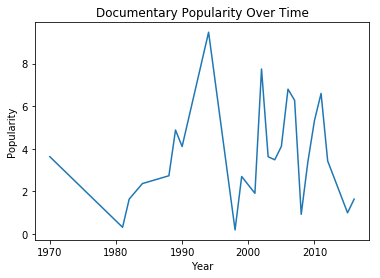

In [104]:
plt.plot(Documentarytrend.release_year, Documentarytrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Documentary Popularity Over Time')

In [68]:
Familytrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Family')]
Familytrend = Familytrend.sort_values(by=['release_year'])
Familytrend.head()

,release_year,genres,popularity
1070,1924,Family,3.878515
57,1937,Family,16.263878
29,1939,Family,22.064932
260,1940,Family,11.120122
86,1941,Family,14.655879


Text(0.5,1,'Family Popularity Over Time')

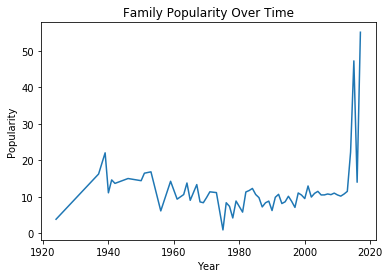

In [105]:
plt.plot(Familytrend.release_year, Familytrend.popularity)
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Family Popularity Over Time')

In [71]:
Fantasytrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Fantasy')]
Fantasytrend = Fantasytrend.sort_values(by=['release_year'])
Fantasytrend.head()

,release_year,genres,popularity
1069,1924,Fantasy,3.878515
56,1937,Fantasy,16.263878
30,1939,Fantasy,22.064932
1151,1943,Fantasy,1.233446
77,1946,Fantasy,15.031588


Text(0.5,1,'Fantasy Popularity Over Time')

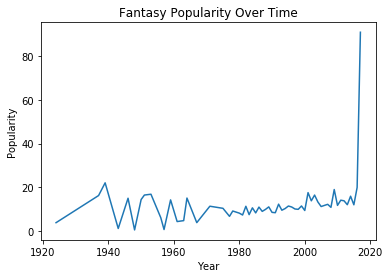

In [106]:
plt.plot(Fantasytrend.release_year, Fantasytrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Fantasy Popularity Over Time')

In [73]:
Foreigntrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Foreign')]
Foreigntrend = Foreigntrend.sort_values(by=['release_year'])
Foreigntrend.head()

,release_year,genres,popularity
1206,1998,Foreign,0.170074
1199,1999,Foreign,0.236466
1195,2000,Foreign,0.492438
1200,2001,Foreign,0.233572
1154,2002,Foreign,1.171499


Text(0.5,1,'Foreign Film Popularity Over Time')

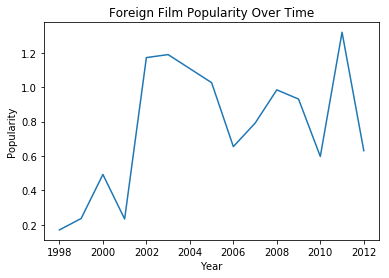

In [107]:
plt.plot(Foreigntrend.release_year, Foreigntrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Foreign Film Popularity Over Time')

In [75]:
Historytrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'History')]
Historytrend = Historytrend.sort_values(by=['release_year'])
Historytrend.head()

,release_year,genres,popularity
1018,1915,History,5.113205
1005,1930,History,5.276546
1108,1933,History,2.886254
854,1935,History,7.135215
1115,1936,History,2.707555


Text(0.5,1,'History Popularity Over Time')

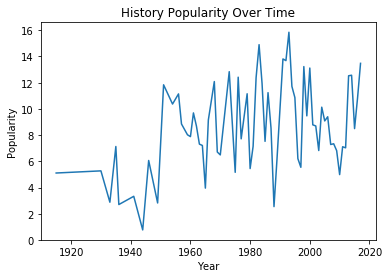

In [108]:
plt.plot(Historytrend.release_year, Historytrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'History Popularity Over Time')

In [77]:
Horrortrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Horror')]
Horrortrend = Horrortrend.sort_values(by=['release_year'])
Horrortrend.head()

,release_year,genres,popularity
762,1931,Horror,7.797364
588,1933,Horror,8.732740
1021,1942,Horror,5.110716
951,1953,Horror,6.035154
1180,1957,Horror,0.756840


Text(0.5,1,'Horror Popularity Over Time')

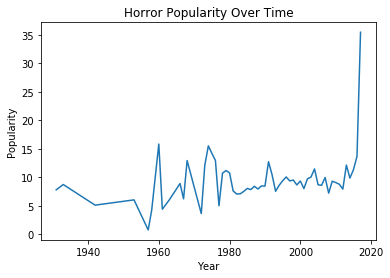

In [109]:
plt.plot(Horrortrend.release_year, Horrortrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Horror Popularity Over Time')

In [80]:
Musictrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Music')]
Musictrend = Musictrend.sort_values(by=['release_year'])
Musictrend.head()

,release_year,genres,popularity
1175,1929,Music,0.758012
1038,1933,Music,4.718154
858,1935,Music,7.122093
1082,1936,Music,3.638881
1186,1938,Music,0.632261


Text(0.5,1,'Musical Popularity Over Time')

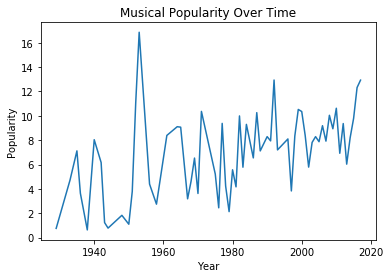

In [110]:
plt.plot(Musictrend.release_year, Musictrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Musical Popularity Over Time')

In [82]:
Mysterytrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Mystery')]
Mysterytrend = Mysterytrend.sort_values(by=['release_year'])
Mysterytrend.head()

,release_year,genres,popularity
1182,1928,Mystery,0.722511
327,1934,Mystery,10.573867
613,1940,Mystery,8.590813
536,1941,Mystery,9.084980
685,1944,Mystery,8.189418


Text(0.5,1,'Mystery Popularity Over Time')

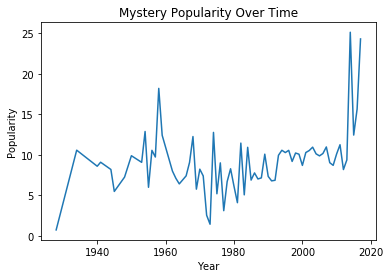

In [111]:
plt.plot(Mysterytrend.release_year, Mysterytrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Mystery Popularity Over Time')

In [84]:
Romancetrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Romance')]
Romancetrend = Romancetrend.sort_values(by=['release_year'])
Romancetrend.head()

,release_year,genres,popularity
1135,1925,Romance,1.714957
1174,1926,Romance,0.765315
1204,1927,Romance,0.205671
1176,1929,Romance,0.758012
942,1931,Romance,6.152482


Text(0.5,1,'Romance Popularity Over Time')

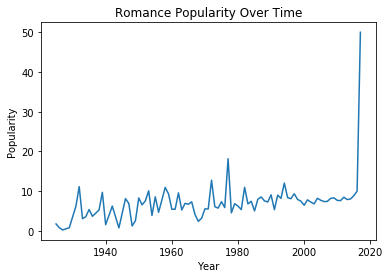

In [112]:
plt.plot(Romancetrend.release_year, Romancetrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Romance Popularity Over Time')

In [86]:
SciFitrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Science Fiction')]
SciFitrend = SciFitrend.sort_values(by=['release_year'])
SciFitrend.head()

,release_year,genres,popularity
1164,1916,Science Fiction,0.917777
88,1927,Science Fiction,14.487867
703,1931,Science Fiction,8.091603
1141,1942,Science Fiction,1.483350
1192,1948,Science Fiction,0.578456


Text(0.5,1,'Sci-Fi Popularity Over Time')

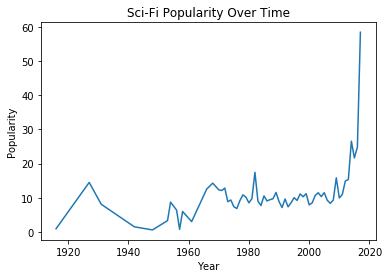

In [113]:
plt.plot(SciFitrend.release_year, SciFitrend.popularity)

plt.xlabel('Year')
plt.ylabel('Popularity')
plt.title(f'Sci-Fi Popularity Over Time')

In [ ]:
SciFitrend = topGenresByPopularity[(topGenresByPopularity['genres'] == 'Science Fiction')]
SciFitrend = SciFitrend.sort_values(by=['release_year'])
SciFitrend.head()

In [ ]:
plt.plot(SciFitrend.release_year, SciFitrend.popularity)

In [117]:
#plot genre popularity with bar graph

# ax = df.plot.bar(x='lab', y='val', rot=0)
# ax = sns.barplot(x=top_genre_popularity['genres'],y=top_genre_popularity['popularity'])
# ax = plt.bar(top_genre_popularity_sorted, "popularity", color='r', alpha=0.5, align="center")

#for x in genre_list :
#     plt.figure(figsize=[20,10])
#     plt.xlim(xmin=1910, xmax=2020)
#     plt.ylim(ymin=0, ymax=150)

#     topGenresByPopularity[x].plot(x='release_year', y='popularity', rot=90)
    
#   plt.xticks()
#     plt.title(x)
    
#    top_genre_popularity_sorted.plot(figsize=(20,10))


#x=ax.set_xlabel("Movie Genre")
#b=ax.set_ylabel("Popularity")
#c=ax.set_xticklabels(labels=ax.get_xticklabels(),rotation=30)
#d=ax.set_title("Top 5 Most Popular Genres of All Time")
# plt.savefig("genre_pop_over_time")
# plt.show()
#scrap this method. 

In [29]:
#EDB
#Top genres by ROI - group genre by ROI
top_genre_ROI = movies_final_df.groupby(["genres"]).mean()["ROI"]
top_genre_ROI

genres
Action              470.952174
Adventure           576.422006
Animation           577.203143
Comedy              384.098260
Crime               385.895644
Documentary        1536.151919
Drama               398.689533
Family              438.762039
Fantasy             496.783416
Foreign             161.144814
History            1236.084687
Horror             3987.583365
Music               498.400770
Mystery            4165.953023
Romance             381.068808
Science Fiction     428.739324
TV Movie            740.000000
Thriller            521.156189
War                 386.824720
Western             325.434653
Name: ROI, dtype: float64

In [32]:
# Find number of movies in each genre (cumulative)

movies_final_df.groupby(["genres","release_date"]).count()["title"].sort_values(ascending=False)

genres           release_date
Drama            2011-12-21      5
                 2011-09-30      5
                 2015-09-11      5
                 2014-12-25      5
                 2010-09-10      5
Adventure        2000-07-08      4
Comedy           2002-12-30      4
Action           2016-09-29      4
Family           2002-03-17      4
Comedy           1995-10-20      4
Thriller         2002-12-30      4
Family           2000-07-08      4
Animation        2000-07-08      4
Drama            2005-09-16      4
                 2002-12-30      4
Comedy           2010-09-10      4
Drama            2016-11-04      4
                 2011-09-09      4
Science Fiction  2002-03-17      4
Drama            2016-10-07      4
Fantasy          2000-07-08      4
Comedy           2010-06-04      4
Drama            2006-08-11      4
Thriller         2002-03-17      4
Adventure        2002-03-17      4
Comedy           1998-10-16      4
Drama            2008-12-25      4
                 2007-08-

In [33]:
#Plot genre popularity over time
# plot data
# fig, ax = plt.subplots(figsize=(15,7))
# use unstack()
# top_genre_popularity_sorted.groupby(['genres', 'release_date']).mean()['popularity'].plot(ax=ax)
#sns.countplot(x='release_date', hue='genres', data=movies_final_df)


In [34]:
topDirectorsbyROI = movies_final_df.groupby(["genres","Director"]).mean()["ROI"]
topDirectorsbyROI=topDirectorsbyROI.to_frame()
topDirectorsbyROI.reset_index()
topDirectorsbyROI
type(topDirectorsbyROI)

pandas.core.frame.DataFrame

In [35]:
topDirectorsbyPopularity = movies_final_df.groupby(["genres","Director"]).mean()["popularity"]
topDirectorsbyPopularity=topDirectorsbyPopularity.to_frame()
topDirectorsbyPopularity
type(topDirectorsbyPopularity)
topDirectorsbyPopularity.index
topDirectorsbyPopularity.reset_index()


,genres,Director,popularity
0,Action,Yeon Sang-Ho,22.685169
1,Action,A.R. Murugadoss,2.280358
2,Action,Aaron Norris,1.557791
3,Action,Abhinay Deo,1.932489
4,Action,Abrid Shine,0.350207
5,Action,Adam McKay,12.536621
6,Action,Adam Rifkin,14.362544
7,Action,Adam Shankman,7.816450
8,Action,Adam Wingard,6.441964
9,Action,Afonso Poyart,2.315249


In [36]:
merge_table = pd.merge(topDirectorsbyROI, topDirectorsbyPopularity, on=(["genres","Director"]), how="outer")
merge_table.reset_index()
type(merge_table)
merge_table.index
merge_table.reset_index(inplace=True)
merge_table.head()


,genres,Director,ROI,popularity
0,Action,Yeon Sang-Ho,-75.852971,22.685169
1,Action,A.R. Murugadoss,417.763278,2.280358
2,Action,Aaron Norris,-15.104883,1.557791
3,Action,Abhinay Deo,340.953545,1.932489
4,Action,Abrid Shine,733.333333,0.350207


In [37]:
merge_table_ROI = merge_table[['genres','Director','ROI']]
merge_table_ROI


,genres,Director,ROI
0,Action,Yeon Sang-Ho,-75.852971
1,Action,A.R. Murugadoss,417.763278
2,Action,Aaron Norris,-15.104883
3,Action,Abhinay Deo,340.953545
4,Action,Abrid Shine,733.333333
5,Action,Adam McKay,70.432927
6,Action,Adam Rifkin,-69.194888
7,Action,Adam Shankman,101.798000
8,Action,Adam Wingard,-52.656780
9,Action,Afonso Poyart,-18.978200


In [38]:
merge_table_popularity = merge_table[['genres','Director','popularity']]
merge_table_popularity

,genres,Director,popularity
0,Action,Yeon Sang-Ho,22.685169
1,Action,A.R. Murugadoss,2.280358
2,Action,Aaron Norris,1.557791
3,Action,Abhinay Deo,1.932489
4,Action,Abrid Shine,0.350207
5,Action,Adam McKay,12.536621
6,Action,Adam Rifkin,14.362544
7,Action,Adam Shankman,7.816450
8,Action,Adam Wingard,6.441964
9,Action,Afonso Poyart,2.315249


In [39]:
movieSortROI = merge_table_ROI.sort_values('ROI',ascending = False).groupby('genres').head(10)
movieSortPopularity = merge_table_popularity.sort_values('popularity',ascending = False).groupby('genres').head(10)

In [ ]:
director_name = input("Enter Director Name")

In [ ]:
moviesBydirector = merge_table_ROI[(merge_table_ROI.Director == director_name)]
moviesBydirector= moviesBydirector.groupby(["genres"]).mean()["ROI"]
moviesBydirector

In [ ]:
fig=plt.figure(figsize=(27,10))
ax = fig.add_subplot(111)

movieSortROI.plot.bar(x = 'genres', y = ['Director', 'ROI'], rot = 40, ax = ax)
#Movie_sort.plot.bar(x = 'genres', y = ['Director', 'ROI'], rot = 40, ax = ax)
for p in ax.patches:
   ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()))

plt.show()

In [ ]:
fig = plt.figure()
fig=plt.figure(figsize=(27,10))
ax = fig.add_subplot(111, projection='3d')
for c, z in zip(['r', 'g', 'b', 'y'], [30, 20, 10, 0]):
   #xs = np.arange(20)
   #ys = np.random.rand(20)
   xs = movieSortROI['genres']
   ys = movieSortROI['Director']
   zs = movieSortROI['ROI']

   cs = [c] * len(xs)
   cs[0] = 'c'
   ax.bar(xs, ys, zs=z, zdir='y', color=cs, alpha=0.8)
   ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1,0.4, 1, 1]))


ax.set_xlabel('Director')
ax.set_ylabel('ROI')
ax.set_zlabel('Genres')

plt.show()